# Part I: Load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 18

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [2]:
df = pd.read_csv('feature_engineering.csv') 
df.head()


forecast_discount_energy  forecast_price_energy_p1  \
0                       0.0                  0.145711   
1                       0.0                  0.165794   
2                       0.0                  0.146694   
3                       0.0                  0.116900   
4                       0.0                  0.164775   

   forecast_price_energy_p2  forecast_price_pow_p1  has_gas  \
0                  0.000000              44.311378        0   
1                  0.087899              44.311378        0   
2                  0.000000              44.311378        0   
3                  0.100015              40.606701        0   
4                  0.086131              45.308378        0   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 16.38               16.38            1       18.89   
1                 28.60               28.60            1        6.60   
2                 30.22               30.22            1       25.46   
3                 44.91               44.91            1       47.98   
4                 33.12               33.12            1      118.89   

   num_years_antig  pow_max  churn  log_cons_12m  log_cons_gas_12m  \
0                6   13.800      0      8.446985               0.0   
1                6   13.856      0      6.300786               0.0   
2                6   13.200      0      7.368340               0.0   
3                6   19.800      0      8.395252               0.0   
4                4   13.200      1      9.024372               0.0   

   log_cons_last_month  log_forecast_cons_12m  log_forecast_cons_year  \
0             0.000000               5.252012                0.000000   
1             0.000000               3.891004                0.000000   
2             0.000000               5.484963                0.000000   
3             6.267201               6.101999                6.267201   
4             7.600402               6.682033                7.600402   

   log_forecast_meter_rent_12m  log_imp_cons  channel_sales_ep  \
0                     2.848971      0.000000                 0   
1                     3.681855      0.000000                 0   
2                     3.036394      0.000000                 0   
3                     4.888317      3.976311                 0   
4                     3.437851      5.205160                 0   

   channel_sales_ew  channel_sales_fo  channel_sales_lm  channel_sales_sd  \
0                 0                 1                 0                 0   
1                 0                 1                 0                 0   
2                 0                 0                 1                 0   
3                 0                 1                 0                 0   
4                 0                 0                 0                 0   

   channel_sales_us  ...  origin_up_lx  origin_up_us  contract_duration  \
0                 0  ...             0             0                 84   
1                 0  ...             0             0                 72   
2                 0  ...             0             0                 72   
3                 0  ...             0             0                 73   
4                 1  ...             1             0                 60   

   activ_diff  end_diff  modif_diff  renewal_diff  price_p1_var_mean  \
0          76        -7          76             4           0.137439   
1          68        -3          68             8           0.170512   
2          69        -2          69             9           0.151210   
3          71        -2          71             9           0.124174   
4          48       -11           2             0           0.168953   

   price_p1_var_std  price_p2_var_mean  price_p2_var_std  price_p3_var_mean  \
0          0.043324           0.000000          0.000000           0.000000   
1          0.002396           0.088421          0.000506           0.000000   
2      

# Part V: Models

In [3]:
# specify features and target
features = df.drop('churn', axis = 1)
target = df['churn']

In [4]:
# Check our binary target
target.value_counts()

0    11873
1     1333
Name: churn, dtype: int64

As we can see from the comparison above, our target is imbalanced.

In [5]:
# dataset spliting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=1)

## Base Models

### Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression() # solver="sag", class_weight="balanced"

# multiclass: multi_class='multinomial'/ 'ovr'
#model = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg', penalty = 'l2',C = 2, max_iter = 100) 

lr = model.fit(x_train, y_train)
lr_pred_test = lr.predict_proba(x_test)[:,1]
lr_pred_train = lr.predict_proba(x_train)[:,1]

In [7]:
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, lr_pred_train)
auc_train = metrics.auc(fpr_train, tpr_train)
print('Training set AUC: ', auc_train)

Training set AUC:  0.6208143702773776


In [8]:
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, lr_pred_test)
auc_test = metrics.auc(fpr_test, tpr_test)
print('Test Set AUC: ',auc_test)

Test Set AUC:  0.5884196386417421


### Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier( n_jobs=-1)
rf = model.fit(x_train, y_train)

# predict
rf_pred_test = rf.predict_proba(x_test)[:, 1]
rf_pred_train = rf.predict_proba(x_train)[:, 1]

In [10]:
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, rf_pred_train)
auc_train = metrics.auc(fpr_train, tpr_train)
print('Training Set AUC: ', auc_train)

Training Set AUC:  1.0


In [11]:
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, rf_pred_test)
auc_test = metrics.auc(fpr_test, tpr_test)
print('Training Set AUC: ',auc_test)

Training Set AUC:  0.6828855455235106


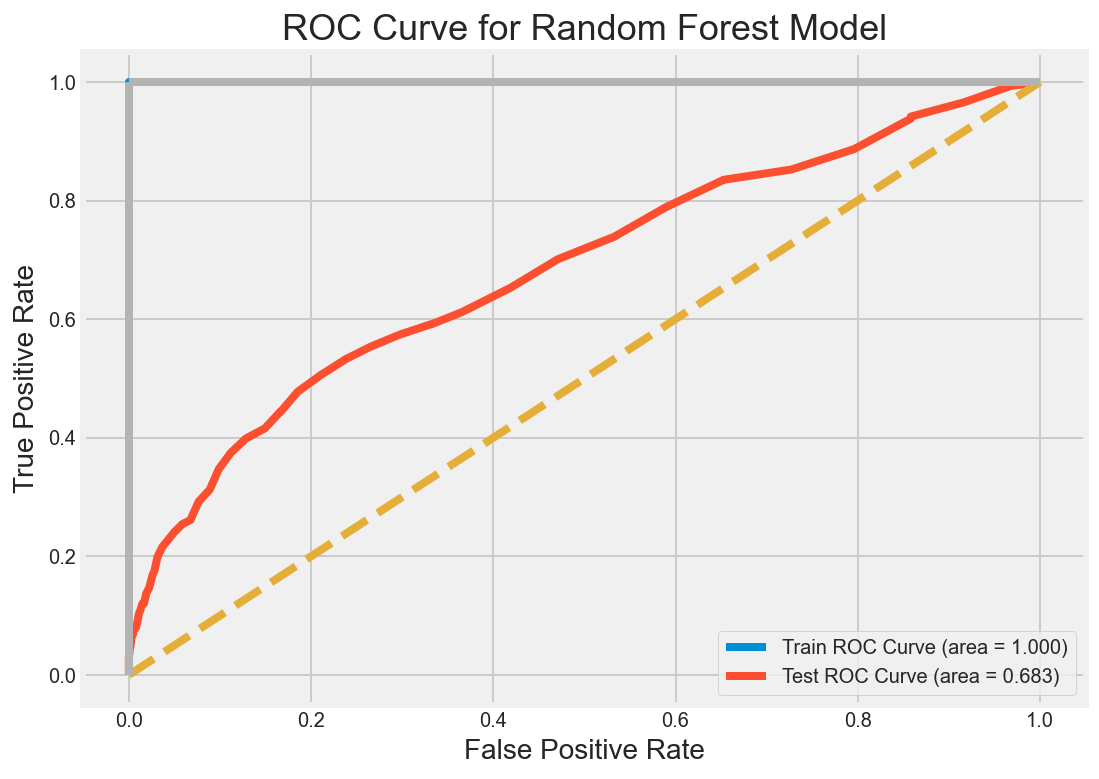

In [12]:
# create ROC curve for the random forest model
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, rf_pred_train)
false_positive_rate_test, true_positive_rate_test, threshold_test = roc_curve(y_test, rf_pred_test)

# plot ROC currve
plt.title("ROC Curve for Random Forest Model")
plt.plot(false_positive_rate, true_positive_rate,label='Train ROC Curve (area = %0.3f)' % roc_auc_score(y_train, rf_pred_train))
plt.plot(false_positive_rate_test, true_positive_rate_test,label='Test ROC Curve (area = %0.3f)' % roc_auc_score(y_test, rf_pred_test))
plt.plot([0,1], ls="--")
plt.plot([0,0], [1,0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()

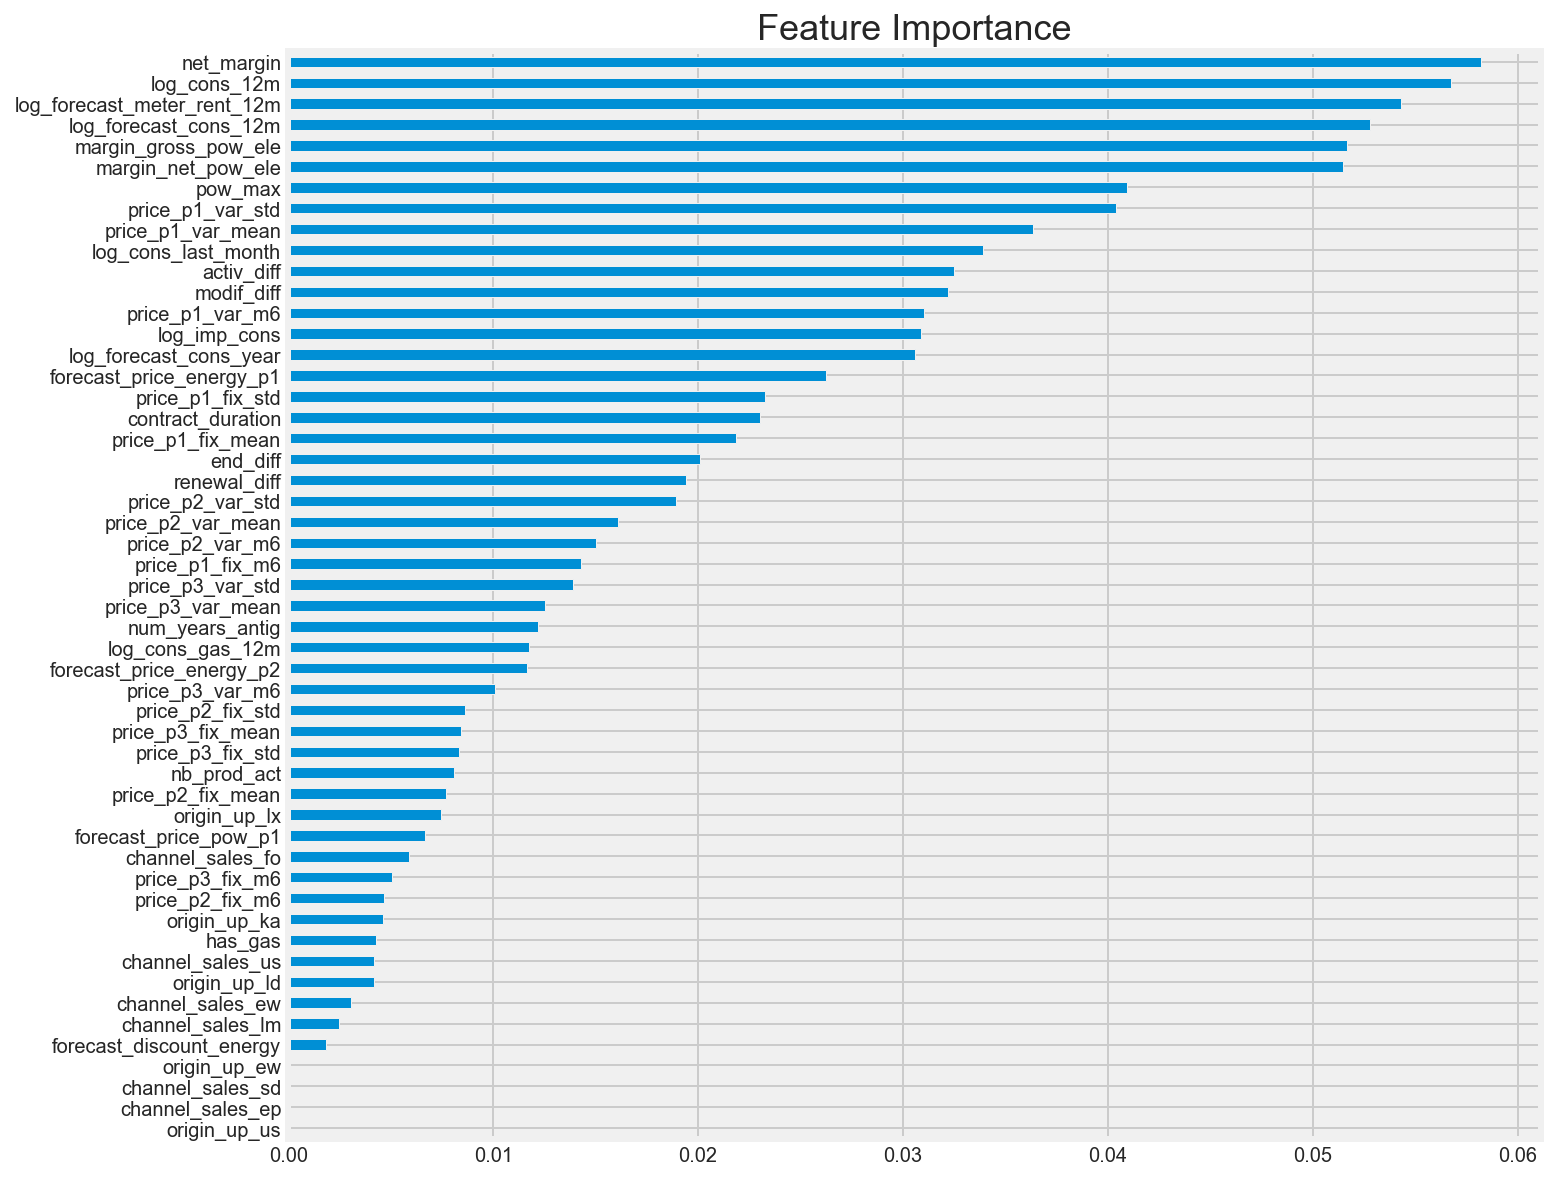

In [13]:
# feature importance
feat_importances = pd.Series(rf.feature_importances_, index=x_train.columns)

plt.figure(figsize=(10,10))
feat_importances.sort_values().plot(kind='barh')
# Create plot title 
plt.title("Feature Importance")
plt.show()

### LightGBM

In [14]:
import lightgbm as lgb
lgb_train = lgb.Dataset(x_train, y_train,feature_name=features.columns.tolist())
lgb_test = lgb.Dataset(x_test, y_test, reference=lgb_train,feature_name=features.columns.tolist())

Start training...
[10]	Train's auc: 0.684862	Evaluation's auc: 0.674803
[20]	Train's auc: 0.721648	Evaluation's auc: 0.686263
[30]	Train's auc: 0.743704	Evaluation's auc: 0.685265
[40]	Train's auc: 0.763451	Evaluation's auc: 0.68682
[50]	Train's auc: 0.777409	Evaluation's auc: 0.684882
[60]	Train's auc: 0.7923	Evaluation's auc: 0.681892
[70]	Train's auc: 0.804011	Evaluation's auc: 0.683374
[80]	Train's auc: 0.812418	Evaluation's auc: 0.680552
[90]	Train's auc: 0.825128	Evaluation's auc: 0.677865
[100]	Train's auc: 0.833008	Evaluation's auc: 0.68113
Metric during training


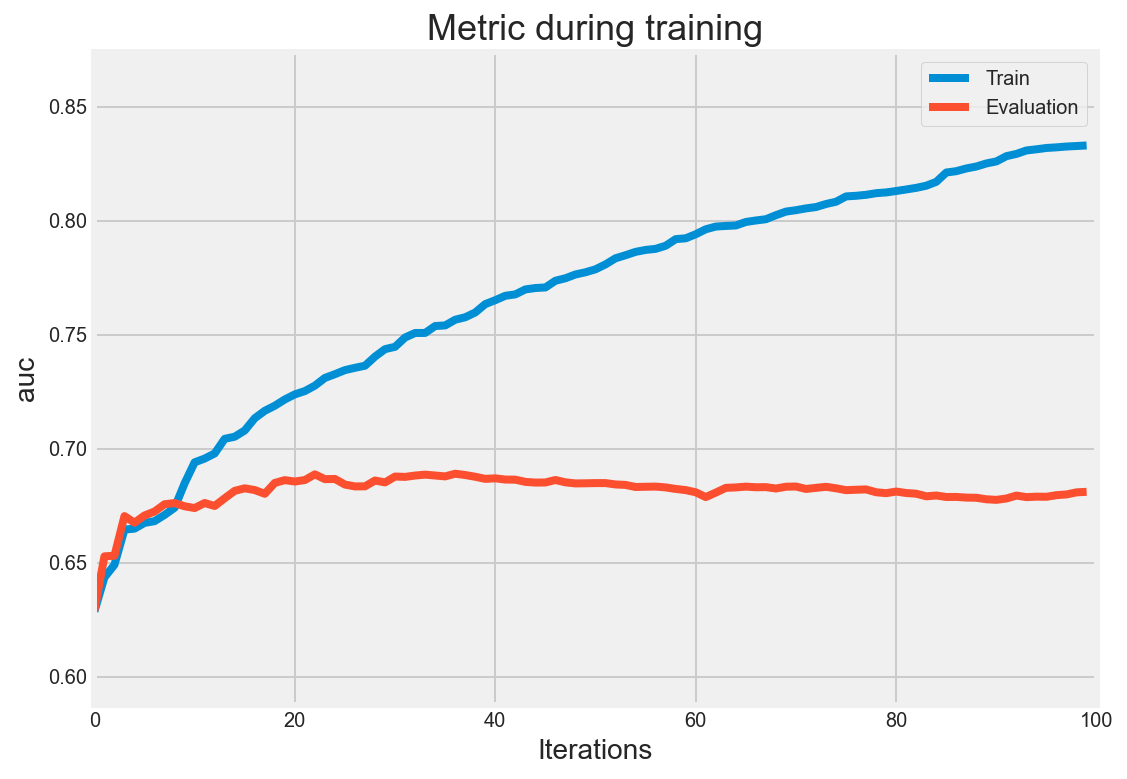

In [15]:
# Set default parameters space
params = {
    'num_leaves': 10,
    'metric': 'auc',
    'verbose': 0
}
evals_result = {}

print('Start training...')

# train the model
gbm = lgb.train(params=params,
                train_set = lgb_train,
                num_boost_round=100,
                valid_sets=[lgb_test,lgb_train],
                valid_names = ['Evaluation','Train'],
                evals_result=evals_result,
                verbose_eval=10)

print('Metric during training')
ax = lgb.plot_metric(evals_result, metric='auc')
plt.show()


### Model Evaluation

In summary, both random forest and lightGBM get relatively good auc score. However, the base ranodm forest model is highly overfitting. Thus, I would like to choose lightGBM in further exploration.

In [16]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE( 'minority', random_state=0, n_jobs=-1)
x_train,y_train = oversample.fit_resample(x_train,y_train)

Using TensorFlow backend.


## Model Tuning with Hyperopt

In [17]:
import hyperopt as hp 
import lightgbm as lgb
from hyperopt import Trials,fmin,STATUS_OK

# Sets the space to search over and the prior probabilities over the search space 
lgbm_space = {

# hp.choice.choice will select 1 value from the given list  , 'dart', 'goss', 'rf'
    'boosting_type': hp.hp.choice('boosting_type',  ['gbdt']),
    'num_leaves':hp.hp.choice('num_leaves', np.arange(10, 300,1, dtype=int)),
     'num_trees':hp.hp.choice('num_trees', np.arange(100, 700,100, dtype=int)),
    'max_depth':hp.hp.choice('max_depth',np.arange(50,100,1, dtype=int)),
    'n_estimators':hp.hp.choice('n_estimators',np.arange(100,1000,100, dtype=int)),
    'min_data_in_leaf':hp.hp.choice('min_data_in_leaf',np.arange(50,300,50, dtype=int)),
    'subsample':hp.hp.quniform('subsample',0.5,1.0,0.05),
    'colsample_bytree':hp.hp.quniform('colsample_bytree',0.5,1.0,0.05),
    'min_child_weight':hp.hp.quniform('min_child_weight', 100, 1000,100),
    'reg_alpha': hp.hp.uniform('reg_alpha', 0.0, 1000.0),
    'reg_lambda': hp.hp.uniform('reg_lambda', 0.0, 1000.0),
    'learning_rate': hp.hp.loguniform('learning_rate', -4, 0),
    'feature_fraction': hp.hp.loguniform('feature_fraction', -4, 0),
    'bagging_fraction': hp.hp.loguniform('bagging_fraction', -4, 0),
    'bagging_frequency':hp.hp.choice('bagging_frequency', np.arange(5, 100,1, dtype=int)),
    'drop_rate': hp.hp.loguniform('drop_rate', -4, 0),
    'scale_pos_weight': hp.hp.uniform('scale_pos_weight', 6.0, 10.0),
    'metric' : 'auc',
    'nthread': 6, 
    'max_bin': 512
    }

In [18]:
# Here we define an objective (loss) function I take 
def objective_m(params, n_folds=10):


    model = lgb.cv(params = params,
                   train_set = lgb_train,
                   num_boost_round = 10000, 
                   early_stopping_rounds = 10,
                   nfold = n_folds)
  
    
    # returns the best average loss on validation set 
    
    loss = 1 - (max(model['auc-mean']))
    return loss


bayes_trials = Trials()
MAX_EVALS = 1000# this controls the runtime 

lgb_best_m = fmin(fn = objective_m, 
                   space = lgbm_space, 
                   algo = hp.tpe.suggest,
                   max_evals = MAX_EVALS, 
                   trials = bayes_trials)

100%|██████████| 1000/1000 [21:31<00:00,  1.34s/trial, best loss: 0.3259575123434635]


In [19]:
lgb_best_m

{'bagging_fraction': 0.030000882751321695,
 'bagging_frequency': 73,
 'boosting_type': 0,
 'colsample_bytree': 0.75,
 'drop_rate': 0.17938886905286797,
 'feature_fraction': 0.40224952780778067,
 'learning_rate': 0.07554421837303613,
 'max_depth': 29,
 'min_child_weight': 100.0,
 'min_data_in_leaf': 2,
 'n_estimators': 8,
 'num_leaves': 199,
 'num_trees': 2,
 'reg_alpha': 1.7268826106778086,
 'reg_lambda': 116.43665138397827,
 'scale_pos_weight': 7.8285871200913215,
 'subsample': 0.9}

We retrain the model with best parameters.

In [65]:
lgb_params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'max_depth': 42,
    'num_leaves' :95,
    'learning_rate': 0.045,
    'n_estimators':50,
    'subsample':0.65,
    #'num_threads' : -1,
    'scale_pos_weight' :7.10,
    'early_stopping_round':10,
     'min_data_in_leaf': 180,#150,
    ' min_child_weight':100,
    # pos_bagging_fraction = ???,
    # neg_bagging_fraction = ???,
    'bagging_fraction': 0.12511891269880548, 
    'bagging_frequency':12,
    'feature_fraction': 0.8812393912734774,
     'num_trees': 100,
    # max_delta_step = ???,
    #'top_rate' : ???
    #'other_rate' : ???
    'lambda_l1':0.489,#0.289,
    'lambda_l2':102.1
}

In [66]:
lgb_gbm = lgb.train(params = lgb_params, train_set = lgb_train,
                    num_boost_round = 100, valid_sets = [lgb_test, lgb_train],
                    feature_name=features.columns.tolist(),
                    valid_names = ['Evaluation', 'Train'])

[1]	Train's auc: 0.557759	Evaluation's auc: 0.547812
Training until validation scores don't improve for 10 rounds
[2]	Train's auc: 0.575716	Evaluation's auc: 0.558245
[3]	Train's auc: 0.619802	Evaluation's auc: 0.617749
[4]	Train's auc: 0.619869	Evaluation's auc: 0.619151
[5]	Train's auc: 0.622297	Evaluation's auc: 0.622055
[6]	Train's auc: 0.622433	Evaluation's auc: 0.62184
[7]	Train's auc: 0.631626	Evaluation's auc: 0.62893
[8]	Train's auc: 0.635724	Evaluation's auc: 0.631244
[9]	Train's auc: 0.63837	Evaluation's auc: 0.634998
[10]	Train's auc: 0.640112	Evaluation's auc: 0.63393
[11]	Train's auc: 0.640339	Evaluation's auc: 0.633904
[12]	Train's auc: 0.643275	Evaluation's auc: 0.638029
[13]	Train's auc: 0.643499	Evaluation's auc: 0.637176
[14]	Train's auc: 0.645064	Evaluation's auc: 0.640823
[15]	Train's auc: 0.646022	Evaluation's auc: 0.643237
[16]	Train's auc: 0.649668	Evaluation's auc: 0.645805
[17]	Train's auc: 0.653186	Evaluation's auc: 0.645268
[18]	Train's auc: 0.655851	Evaluat

In [67]:
from sklearn import metrics
# predict on eval set
#lgb_preds_train = lgb_gbm.predict(train_features_pca)
#lgb_preds_val = lgb_gbm.predict(val_features_pca)
lgb_preds_train = lgb_gbm.predict(x_train)
lgb_preds_test = lgb_gbm.predict(x_test)

# print AUC score
fpr, tpr, thresholds = metrics.roc_curve(y_train, lgb_preds_train)
print("Training Set AUC:",metrics.auc(fpr, tpr))
fpr, tpr, thresholds = metrics.roc_curve(y_test, lgb_preds_test)
print("Validation Set AUC:",metrics.auc(fpr, tpr))

Training Set AUC: 0.6908460882614955
Validation Set AUC: 0.6569413322692252


# Part III: Analysis on the final model

### ROC curve

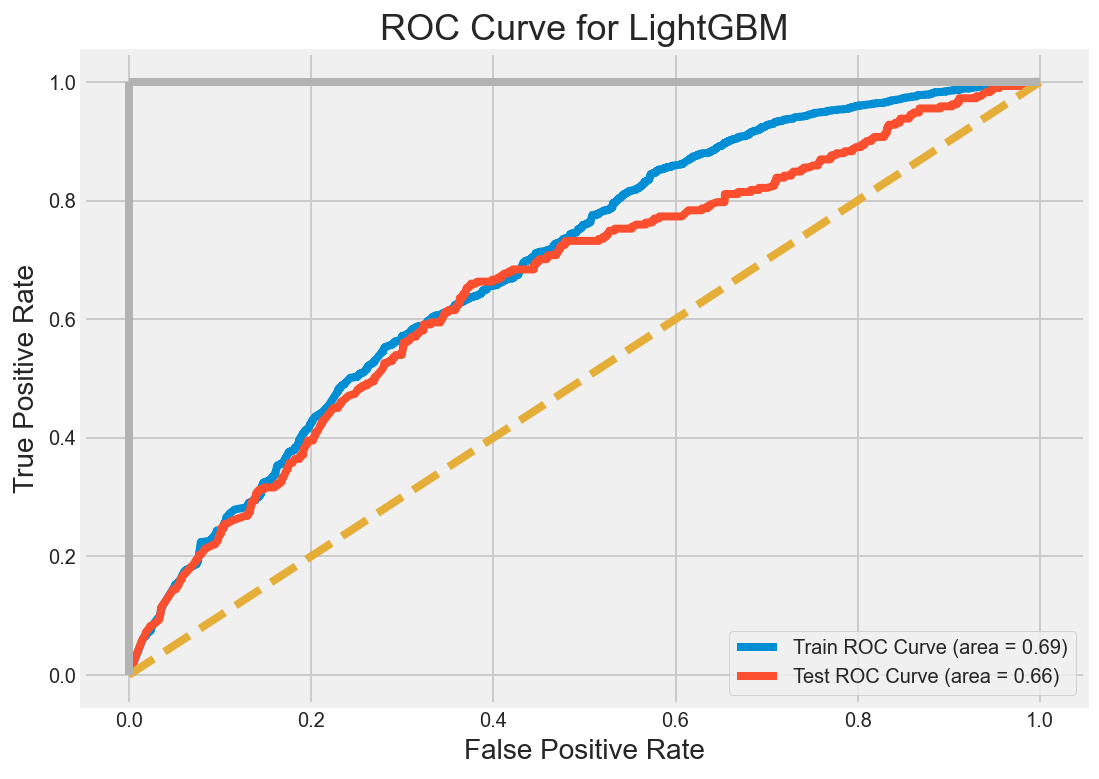

In [69]:
# create ROC curve for the random forest model
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, lgb_preds_train)
false_positive_rate_test, true_positive_rate_test, threshold_test = roc_curve(y_test, lgb_preds_test)

# plot ROC currve
plt.title("ROC Curve for LightGBM")
plt.plot(false_positive_rate, true_positive_rate,label='Train ROC Curve (area = %0.2f)' % roc_auc_score(y_train, lgb_preds_train))
plt.plot(false_positive_rate_test, true_positive_rate_test,label='Test ROC Curve (area = %0.2f)' % roc_auc_score(y_test, lgb_preds_test))
plt.plot([0,1], ls="--")
plt.plot([0,0], [1,0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()



The AUC score for our training set and test set are 【0.69】 and 【0.66】, respectively. This model fits very well, since the differece of AUC score between training set and test set is within 0.03 points.

### Accuracy

In [79]:
test_preds_outcome =np.where(lgb_preds_test>0.5, 1, 0)

#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_preds_outcome, y_test)
accuracy

0.8898561695685087

Our model achieves an accuracy score of 0.89.

### Confusion Matrix

In [80]:
from sklearn.metrics import confusion_matrix 


#use pandas 'crosstab' function to produce a more readable confusion matrix
cm = pd.crosstab(y_test, test_preds_outcome,
            rownames=['Actual'], colnames=['Predicted'], margins=True)
cm

Predicted     0   All
Actual               
0          2351  2351
1           291   291
All        2642  2642

In [81]:
Sensitivity =cm.iloc[1,1] / (cm.iloc[1,1] + cm.iloc[0,1])
Sensitivity

0.1101438304314913

In [82]:
Specificy =cm.iloc[0,0]/(cm.iloc[0,0] + cm.iloc[1,0])
Specificy

0.8898561695685087

### Find a optimal threshold

In [83]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, lgb_preds_test)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.3081471968331863

To achieve a better balance between tpr and fpr, the picked threshold should be 0.31.

# Part IV: Model Explainability

## Feature Importance and Tree Plot

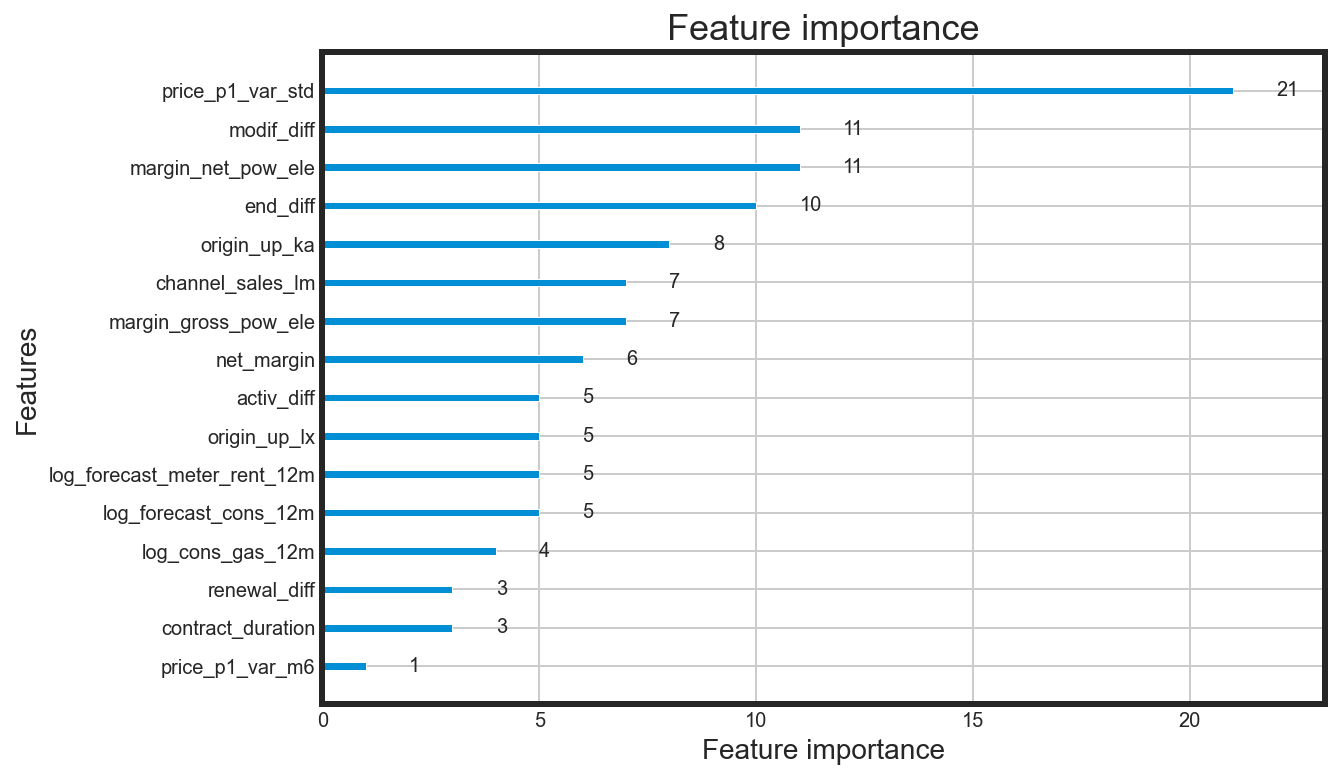

In [84]:
# plot feature importance
ax = lgb.plot_importance(lgb_gbm) 
plt.show();

Observations:
- The most important feature for this model is price_p1_std. This confirms our assumption that customers are price-sensitive.
- The second important feature is margin_net_pow_ele, which refers to the net margin on power subscription.
- The forecast consumption for next 12 month is also related to churn probability.
- Whether the contract is close to modification/ end or not also has a strong effect on the churn probability.
- Some electricity campains, such as ka and lx, seem to be important factors that lead to churn.

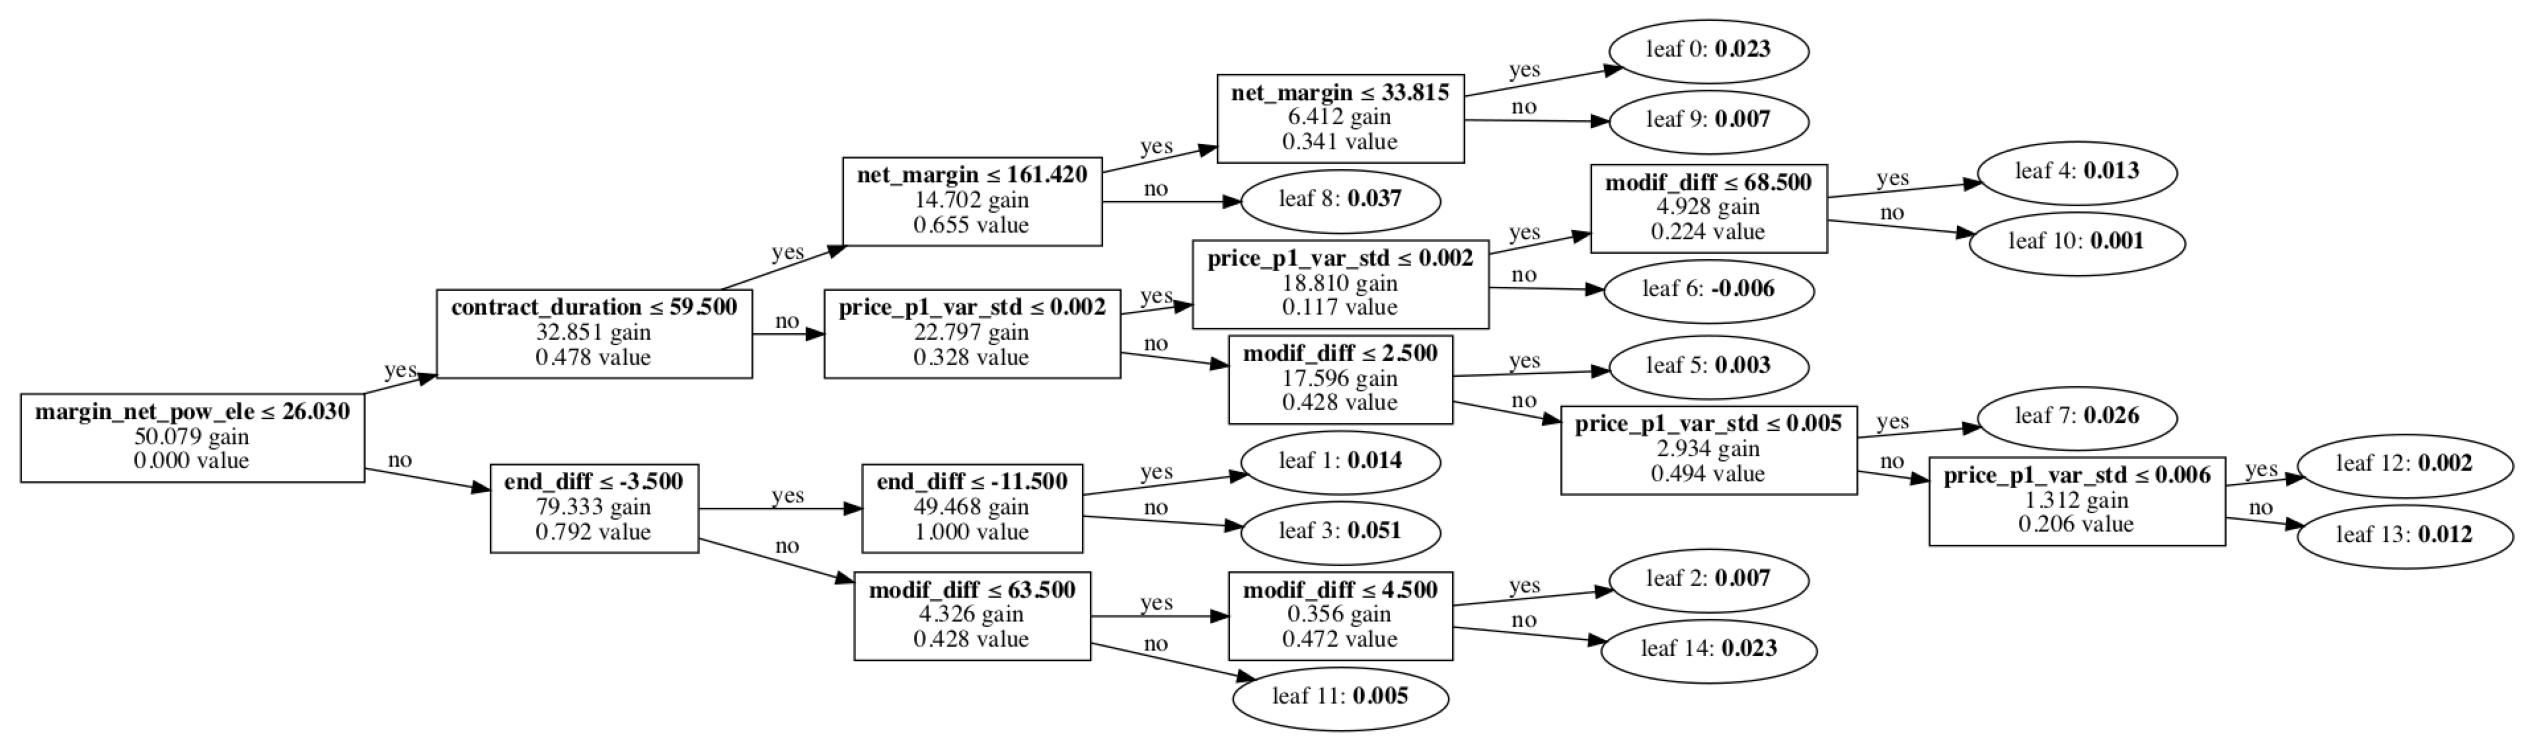

In [85]:
ax = lgb.plot_tree(lgb_gbm, tree_index=22, figsize=(20, 12), show_info=['split_gain','internal_value'])
plt.show()

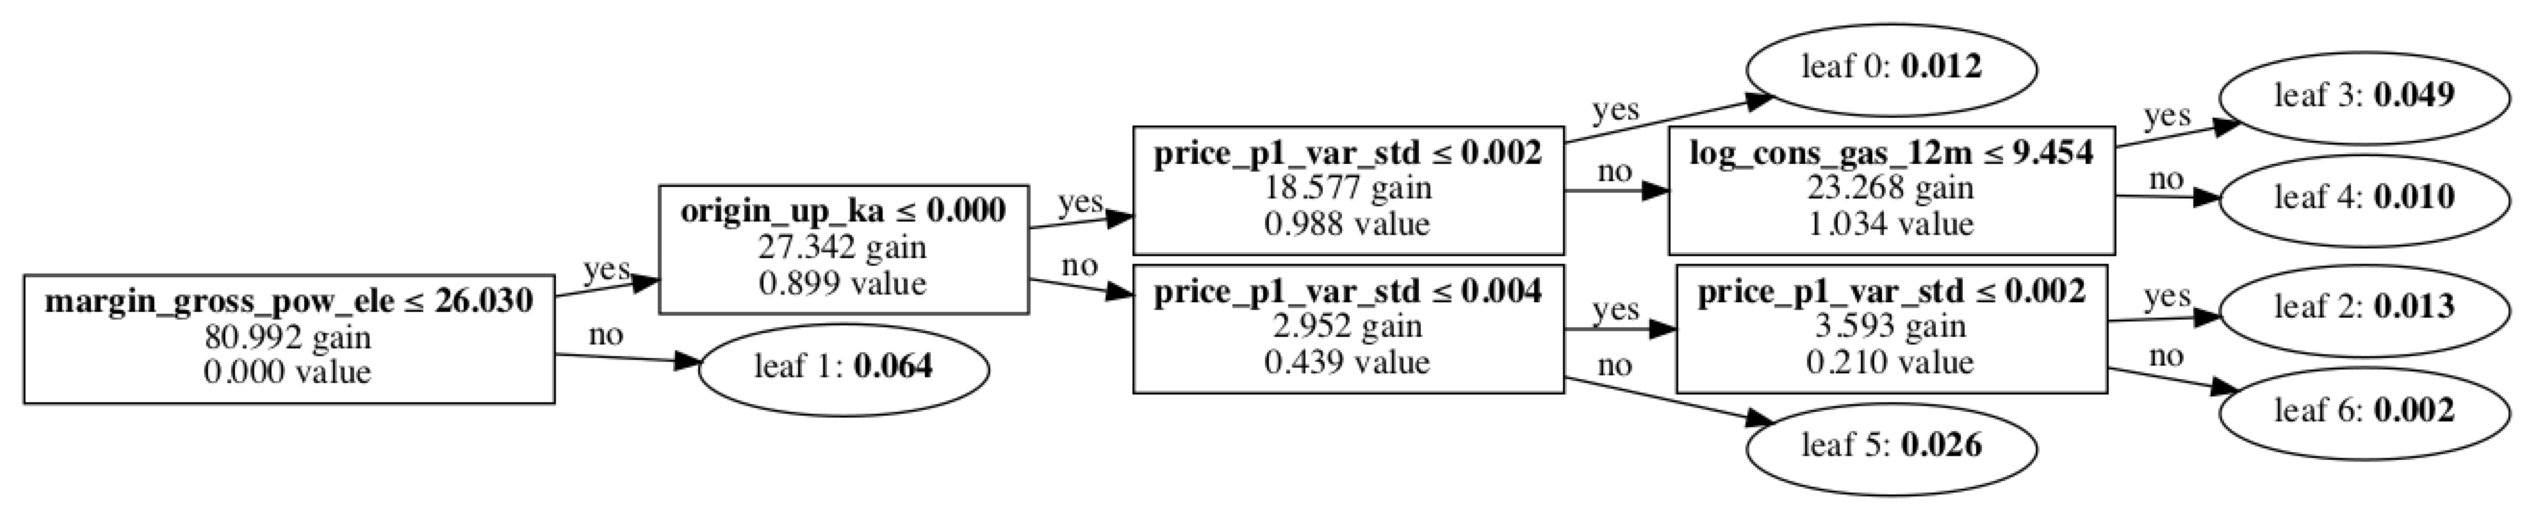

In [86]:
ax = lgb.plot_tree(lgb_gbm, tree_index=11, figsize=(20, 12), show_info=['split_gain','internal_value'])
plt.show()

Observations:
- From this tree, we can see some important thresholds for certain features.
- First and foremost, the value of 31.190 is an important threshold for margin_net_pow_ele. Customers are associated with less power consumption are more likely to churn.
- Furthermore, customers who got subscription from the ‘lm’ compain are less likely to churn.
- Customers who also has low consumption of gas (less than log value of 9.454) seem to have higher probability of churn.
- Customers who are offered a stable price (price standard deviation<=0.002) are more likely to retain.

## SHAP

In [756]:
import shap
shap_explainer = shap.TreeExplainer(lgb_gbm)

# Calculate Shap values
shap_vals_train = shap_explainer.shap_values(x_train)
shap_vals_test = shap_explainer.shap_values(x_test)

In [757]:
# Explaining an random instance
# choose the first observation in the training set
shap_vals_sub_train = shap_explainer.shap_values(x_train[:1])

shap.initjs()
shap.force_plot(shap_explainer.expected_value[1], shap_vals_sub_train[1], x_train[:1])

### Summary Plots
- Train summary plot
- Test summary plot

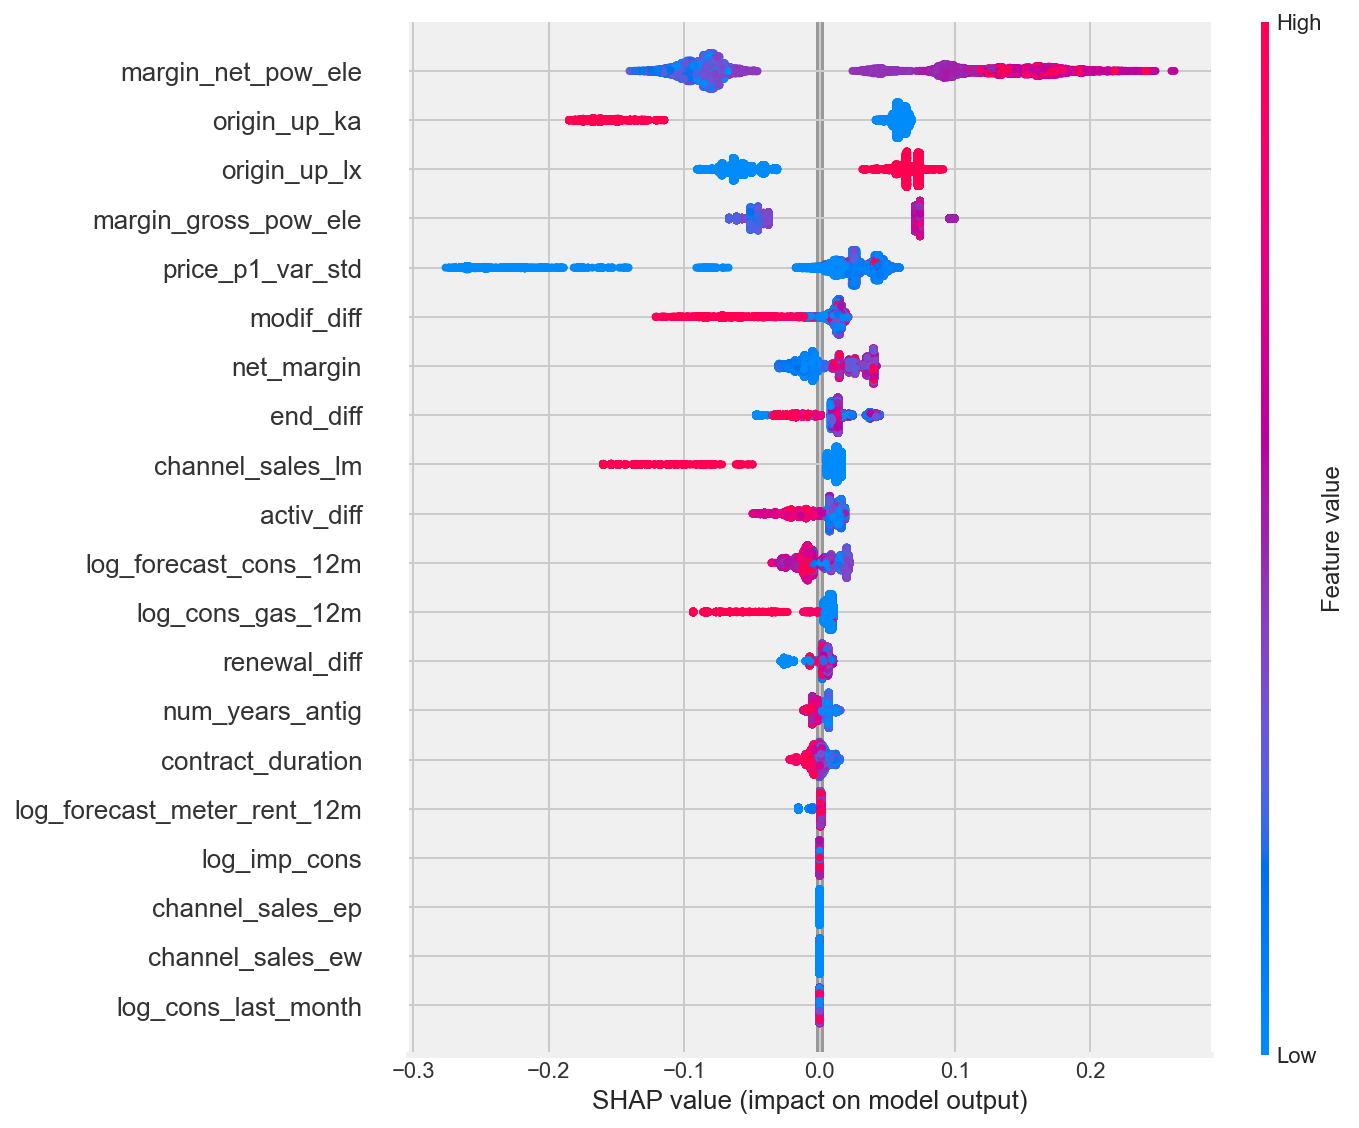

In [758]:
# plot the variable importance of all of our variables in a summary plot
# summary plot for training set
shap.summary_plot(shap_vals_train[1], x_train)

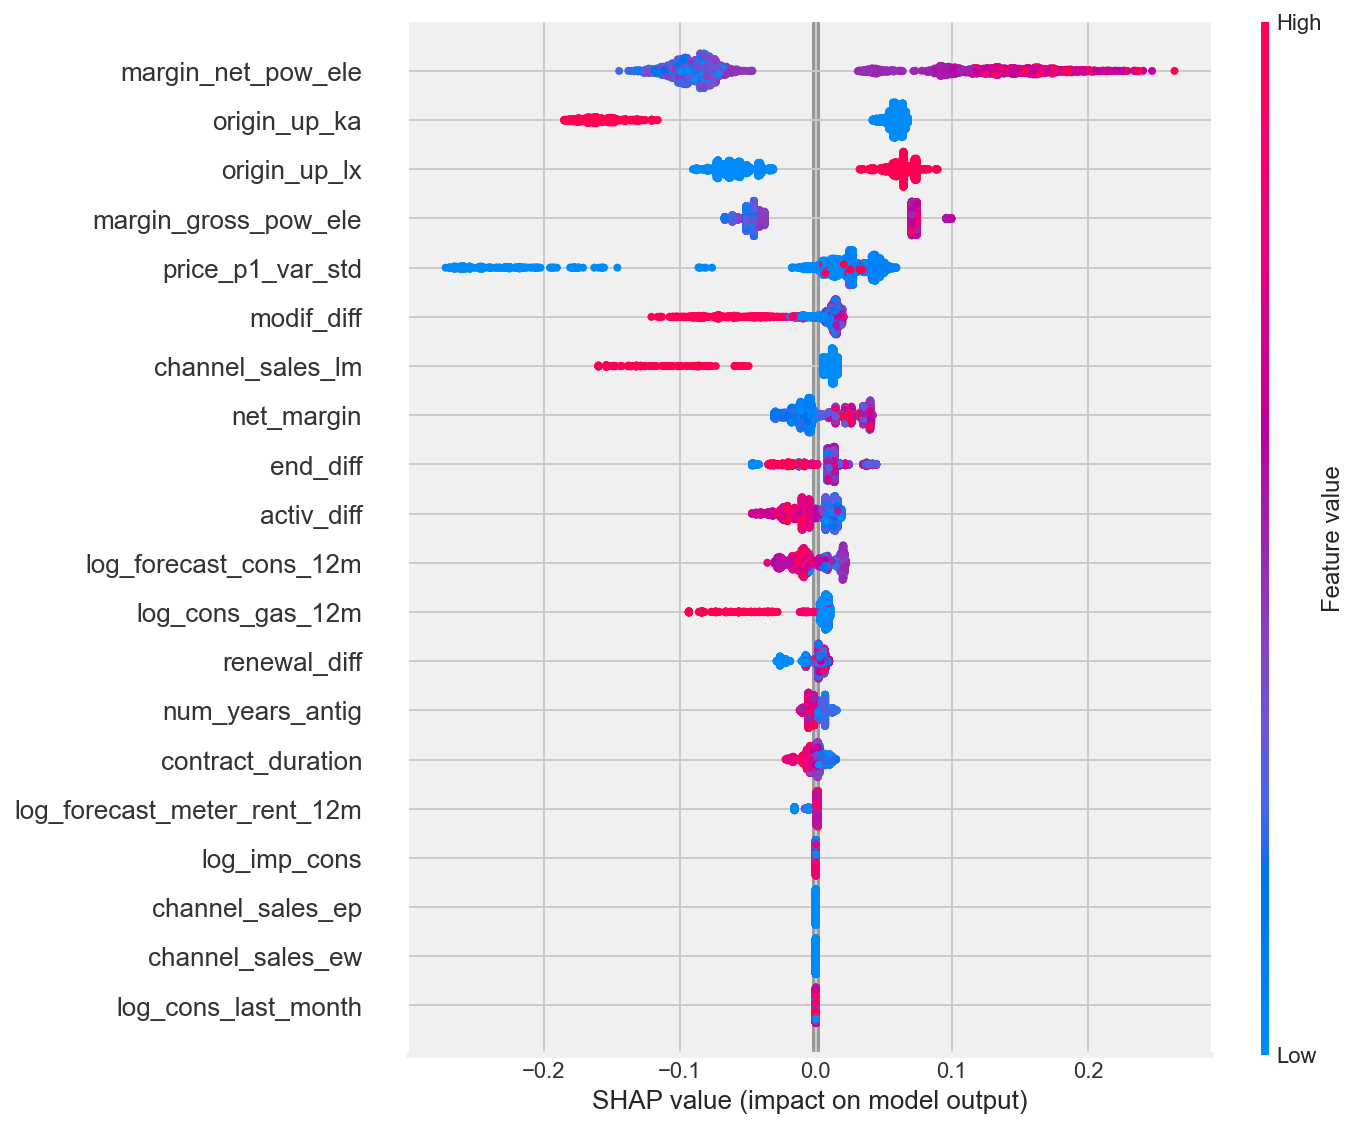

In [759]:
# summary plot for test set
shap.summary_plot(shap_vals_test[1], x_test)

Observation:
- The rank of feature importance is the same as what we get from the training set. 
- The patterns and distributions are similar to summary plot of traning set. For instance, as the value of margin_net_pow_ele increase, it yields a higher SHAP value, which is pushing towards a higher prediction (probability of 1).
- Nothing is obviously contradicting between training set and test set.
- Margin net and margin gross seem to be important feature to drive churn rate. A higher net margin of power subcription yields a higher shap value. A similar pattern exists in the feature of gross margin.
- The electricity campaign that the customer first subscribed to has a strong effect on churn rate. While the campain 'lx' has a positive effect, the campain 'ka' has a negative effect.
- Customers who are offered more stable prices are having high probabilties of retaining.
- Customers whose contracts need a long time too modify or end have higher probabilities of churning.
- The sales channel ‘lm’ has a negative effect on churn rate.


### Dependence Plot

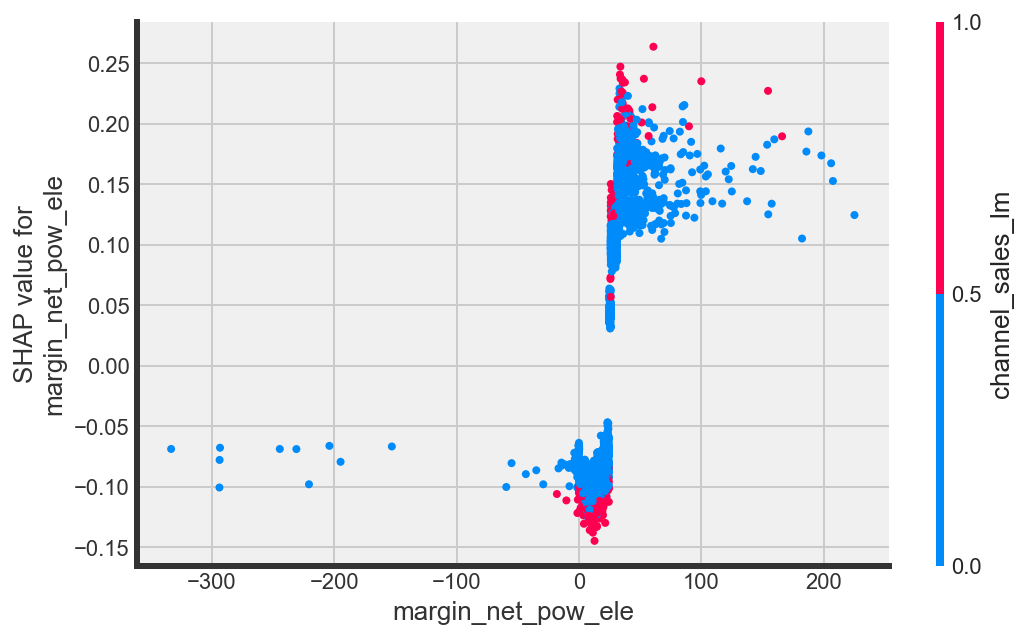

In [766]:

shap.initjs()
shap.dependence_plot("margin_net_pow_ele", shap_vals_test[1], x_test)

From the above dependence plot, we can see that “margin_net_pow_ele” shows an obvious pattern. This pattern is confirmed by the tree plot that we got from the lightGBM model.

The value of 31.190 might be a clear-cut threhsold for this feature. It is also interfered by sales channels. 

### Interaction plot

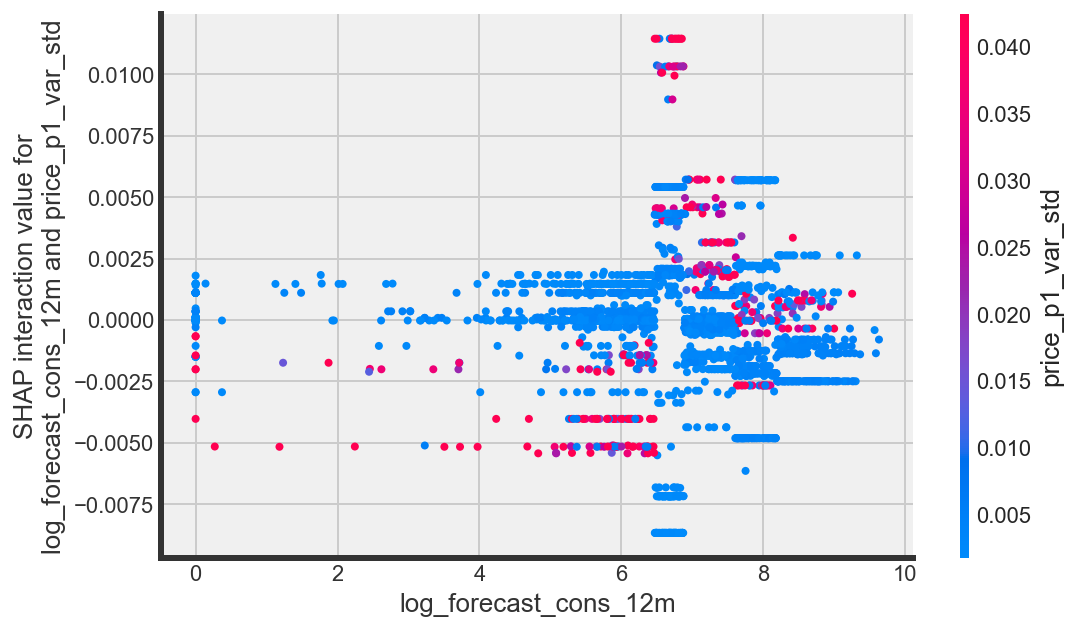

In [767]:
# interaction between forecasted consumption and price std
lgb_var_interactions = shap.TreeExplainer(lgb_gbm).shap_interaction_values(x_test)
shap.dependence_plot(("log_forecast_cons_12m", "price_p1_var_std"),
                     lgb_var_interactions, x_test,
                     display_features = x_test)


Observations:
- Clients who consume relatively high volumn of power are more sensitive to price change.
- Also, clients who are associated with low power consumption, though their prices are quite stable, are having a high probability of churn.

### Force Plot of a churned case

In [88]:
#get a churned cases
pred_df= pd.DataFrame()
pred_df['prob'] = lgb_preds_test
pred_df['churn'] = np.where(pred_df['prob']>0.3101, 1, 0)

churned_index = pred_df[pred_df['churn']==1]
print(churned_index)

          prob  churn
8     0.370965      1
12    0.390640      1
14    0.346344      1
15    0.383343      1
20    0.361601      1
...        ...    ...
2619  0.412665      1
2624  0.351825      1
2631  0.397987      1
2639  0.333860      1
2641  0.359435      1

[1047 rows x 2 columns]


In [898]:
# show a negative case
shap_vals_sub_train = shap_explainer.shap_values(x_train[8:9])

shap.initjs()
shap.force_plot(shap_explainer.expected_value[1], shap_vals_sub_train[1], x_train[:1])

We select a churn case and visualize the force plot. From the plot, we can find that several factors driving this case to churn:
- a low value of margin_net_pow_ele (threshold = 31.190)
- a relatively low value of margin_gross_pow_ele
- subscribe to the electricity campaign of 'lx' rather than'ka'

# Part V: Discount Strategy

## The effectiveness of 20% Discount Strategy

Strategy: give a 20% discount to high probability-to-churn customers.

For simplisity, we make some assumptions about this problem:
- Customers who consider churning will stop the contract within the first three months.
- When you offer a discount, only a certain part of customers will accept it. It depends on how good the deal is. We assume that the fraction is similar to discount.
- Discount strategy should not decrease the overall revenue.

Objective:
- Find the appropriate cut-off to decide who should be offered the 20% discount, and also could maxmize the revenue.

In [89]:
pred_df = pd.concat([x_test.reset_index(),pred_df],axis = 1)
pred_df.head()

index  forecast_discount_energy  forecast_price_energy_p1  \
0   2835                       0.0                  0.158850   
1   2875                       0.0                  0.143478   
2   1868                       0.0                  0.115237   
3   8034                       0.0                  0.146694   
4    847                       0.0                  0.162461   

   forecast_price_energy_p2  forecast_price_pow_p1  has_gas  \
0                  0.081596              44.311378        0   
1                  0.000000              44.311378        0   
2                  0.100123              40.939027        0   
3                  0.000000              44.311378        0   
4                  0.083816              46.305378        0   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 16.92               16.92            2       69.41   
1                  3.70                3.70            1      331.99   
2                 22.28               22.28            1       85.18   
3                 28.50               28.50            1       55.76   
4                 21.09               21.09            1       10.47   

   num_years_antig  pow_max  log_cons_12m  log_cons_gas_12m  \
0                6   10.392      9.053687               0.0   
1                3   13.856     11.272038               0.0   
2                6   15.100     10.130264               0.0   
3                5   13.800      8.155649               0.0   
4                6   10.392      7.239215               0.0   

   log_cons_last_month  log_forecast_cons_12m  log_forecast_cons_year  \
0             8.058011               6.681545                8.058011   
1             8.474912               8.165571                0.000000   
2             6.232448               6.560083                6.232448   
3             0.000000               6.272556                0.000000   
4             6.118097               5.117455                6.118097   

   log_forecast_meter_rent_12m  log_imp_cons  channel_sales_ep  \
0                     2.851284      5.603299                 0   
1                     2.802148      0.000000                 0   
2                     4.888016      3.911423                 0   
3                     2.992226      0.000000                 0   
4                     2.837323      3.997099                 0   

   channel_sales_ew  channel_sales_fo  channel_sales_lm  channel_sales_sd  \
0                 0                 1                 0                 0   
1                 0                 1                 0                 0   
2                 0                 1                 0                 0   
3                 0                 1                 0                 0   
4                 0                 1                 0                 0   

   channel_sales_us  ...  contract_duration  activ_diff  end_diff  modif_diff  \
0                 0  ...                 77          71        -5           6   
1                 0  ...                 48          36       -11           2   
2                 0  ...                 84          75        -8          75   
3                 0  ...                 60          56        -3          18   
4                 0  ...                 84          73       -10           3   

   renewal_diff  price_p1_var_mean  price_p1_var_std  price_p2_var_mean  \
0            10           0.166301          0.006338           0.084582   
1             0           0.132965          0.044161           0.000000   
2             3           0.123874          0.004579           0.103821   
3             8           0.151226          0.002357           0.000000   
4             1           0.167105          0.004375           0.085640   

   price_p2_var_std  price_p3_var_mean  price_p3_var_std  price_p1_fix_mean  \
0          0.003272           0.000000          0.000000          44.266930   
1          0.000000           0.

In [90]:
# If no customer churn: Calculate the baseline revenue
# baseline revenue = forecast consumption in the next 12 month * forecast price + meter rental fee for 12 months
pred_df['power_revenue'] = (np.exp(pred_df['log_forecast_cons_12m']) -1) * pred_df['forecast_price_energy_p1']
pred_df['meter_revenue'] = np.exp(pred_df['log_forecast_meter_rent_12m']) -1
pred_df['base_revenue'] = pred_df['power_revenue'] + pred_df['meter_revenue']

In [624]:
# If customers with high churn-probability all quit in the first three months

# Assume the probabilty of a churned customer is 100% thourgh 12 months
# Then, churn on the first day we lose 100%=1
# churn in the end of March we lose 1-1/365*90= 0.754
# On average, we lose = 0.877


pred_df['class'] = np.where(pred_df['prob']>0.308,1,0)

pred_df['after_churn_revenue'] = pred_df['base_revenue'] *(1 - 0.877*pred_df['class']) # use predicted probability

In [625]:
# for a given cutoff, calcualte revenue difference after offering a discount

np.set_printoptions(suppress=True)

def get_rev_delta(df, cutoff=0.5, discount = 0.2):
    df['discount_rev'] = df['after_churn_revenue']
    df.loc[df['prob']>cutoff, 'discount_rev'] = df['base_revenue'] *(1-discount)*discount # acceptance = discount
    df['rev_delta'] = df['discount_rev']- df['after_churn_revenue']
    return np.round(df['rev_delta'].sum(),3)

In [626]:
# calcualte possible rev_delta for a given range of cut_off
rev_df = pd.DataFrame()
rev_df['possible_cut'] = np.arange(0,1, 0.01)

possible_delta=[]
for i in rev_df['possible_cut'].tolist():
    temp = get_rev_delta(pred_df,i,0.2)
    #print(temp)
    possible_delta.append(temp) # round to 3 decimals

rev_df['sum_rev_delta'] = possible_delta

In [627]:
rev_df.head()

possible_cut  sum_rev_delta
0          0.00     -302926.83
1          0.01     -302926.83
2          0.02     -302926.83
3          0.03     -302926.83
4          0.04     -302926.83

In [628]:
# find the cutoff with maximal revenue delta
idx = rev_df['sum_rev_delta'].idxmax()
optimal_cut = rev_df.loc[idx,'possible_cut']
max_rev_delta = rev_df['sum_rev_delta'].max()


The cut-off 0.31 has the maximal revenue delta of $ 12427.844


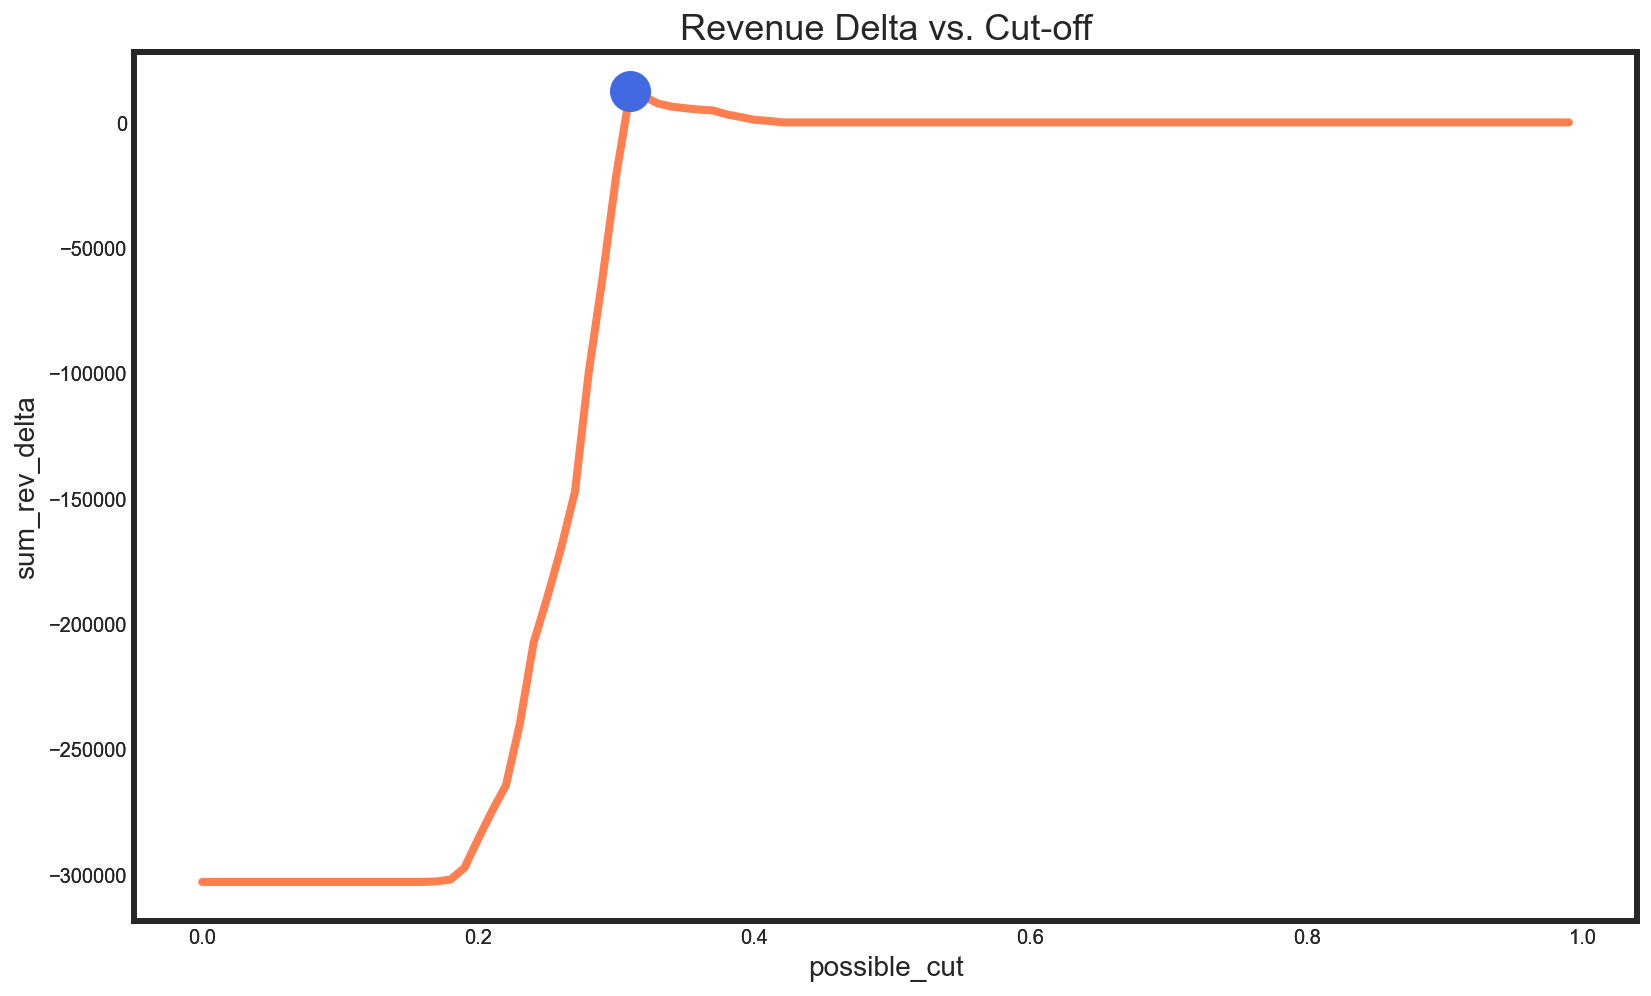

In [629]:
# line plot
fig = plt.figure(figsize=[12,8])
ax1 = fig.add_subplot(111)
sns.lineplot(x = 'possible_cut', y='sum_rev_delta', data = rev_df,markers=True,color='coral')

ax2 = fig.add_subplot(111, frameon=False, sharex=ax1, sharey=ax1)
plt.scatter(optimal_cut, max_rev_delta, s=400,color = 'royalblue')
plt.title('Revenue Delta vs. Cut-off')
print('The cut-off',optimal_cut, 'has the maximal revenue delta of $',max_rev_delta)

In [630]:
print('Revenue after churn for next 12 months: $',np.round(pred_df['after_churn_revenue'].sum(),3))

Revenue after churn for next 12 months: $ 417726.926


Suggestions:
- If we take the churn likelihood into consideration, the overall revenue coming from customers in test dataset would be $417726.926.

- Offering a 20 percent discount to customers with high churn probability is an effective measure.

- We can pick an optimal cut-off from revenue calculation. If we offer a 20 percent discount to customers whose churn probability is higher than 0.31, the revenue would increase by $12427.844.

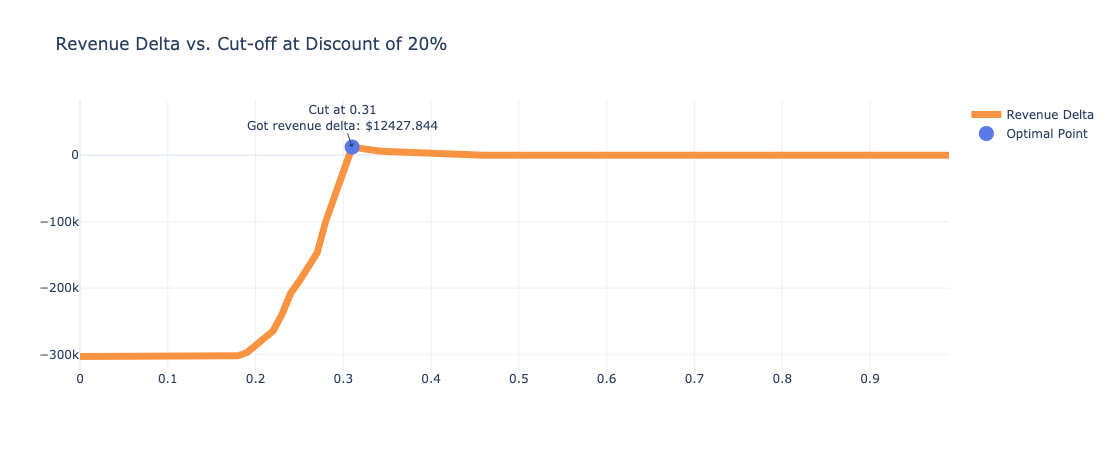

In [698]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=rev_df['possible_cut'], y=rev_df['sum_rev_delta'],
                    mode='lines',name='Revenue Delta',
                         hovertemplate='Cut: %{x:.2f}<br>Revenue Delta: %{y:$.2f}',
                        line=dict(color='rgb(248,148,65)', width=7)))
fig.add_trace(go.Scatter(x=[optimal_cut], y=[max_rev_delta],
                    mode='markers', name='Optimal Point',
                         hovertemplate='Cut: %{x:.2f}<br>Revenue Delta: %{y:$.2f}',
                        marker=dict(color='rgb(90,122,231)', size=15)))
fig.update_layout(template='plotly_white',title='Revenue Delta vs. Cut-off at Discount of 20%', 
                  autosize=True)
fig.add_annotation(x=optimal_cut, y=max_rev_delta+1,
            text='Cut at ' + str(optimal_cut)+'<br>Got revenue delta: $'+str(max_rev_delta),
            showarrow=True,
            arrowhead=1)
fig.show()
fig.write_html("img/rev_v_cutoff_at20.html")

## How to find a optimal discount and cut-off combination?

In [729]:
cuts = np.arange(0.1,1,0.01)
discounts = np.linspace(0.1,0.9,len(cuts))


rev_delta_new = []
for i in discounts:
    temp = []
    for j in cuts:      
        value = get_rev_delta(pred_df,j,i)
        #print(value)
        temp.append(value) # round to 3 decimals
    #print(temp)
    rev_delta_new.append(temp)

In [730]:
x = discounts
y = cuts
z = rev_delta_new

In [731]:
# find the max revenue delta and optimal cut-off/ discount
max_value = np.amax(z)
np.where(z == np.amax(z))

(array([44, 45]), array([21, 21]))

In [732]:
np.amax(z)

42650.951

In [733]:
# Find index of maximum value from 2D numpy array
result = np.where(z == np.amax(z))
print('Tuple of arrays returned : ', result)

max_point_x = discounts[result[1]]
max_point_y = cuts[result[0]]

Tuple of arrays returned :  (array([44, 45]), array([21, 21]))


In [762]:
import plotly.offline as pyo
import plotly.graph_objs as go

fig2 = go.Figure()
fig2.add_trace(go.Surface(z=z, x=x, y=y,name="Revenue Surface",
                        hovertemplate = 'Discount: %{x:.2f}<br>Cut: %{y:$.2f}<br>Revenue Delta: %{z:$.2f}'))
fig2.update_layout(template='plotly_white',title='Revenue Delta vs. Cut-off vs. Discounts', 
                  autosize=False,width=700,height=700)
fig2.update_layout(scene = dict(
                    xaxis_title='Discounts',
                    yaxis_title='Cut-off',
                    zaxis_title='Revenue Delta'))

fig2.update_traces(cmid=-100000, selector=dict(type='surface'))
fig2.add_trace(go.Scatter3d(z=[np.amax(z)],x=max_point_x, y=max_point_y,
                   marker = dict(size = 12,color = 'rgb(90,122,231)'),name="Optimal Point"))

fig2.show()
fig2.write_html("img/rev_v_cutoff_v_discount.html")

In [763]:
from IPython.display import HTML
HTML(filename='img/rev_v_cutoff_v_discount.html')

The 3D surface plot shows： 

The best strategy is to offer 29% off at the cut-off 0.54. We will achieve $42650.95 in revenue delta.

In [764]:
# save the model
import pickle
with open('power.pkl','wb') as f:
    pickle.dump(lgb_gbm, f)
    pickle.dump(features, f)
    pickle.dump(target, f)
    pickle.dump(pred_df, f)
    pickle.dump(rev_df,f)